In [2]:
using JSON3
using HTTP
using Dates
using Plots

In [3]:
url = "https://mrsat.test-citiaps.cl"

function getjson(url::String)
    resp = HTTP.get(url)
    str = String(resp.body)
    json = JSON3.read(str)
    return json
end

getjson (generic function with 1 method)

In [4]:
status = getjson(url * "/status")
println(status)

{
      "date": "2023-04-27 08:20:14",
    "status": "Ok",
   "message": "[PH] Todo Funcionando."
}


In [5]:
areas = getjson(url * "/mrsat/areas")
analysis = getjson(url * "/mrsat/analysis")

fill_types = [
    "fill_0"
    "fill_interpolated"
    "fill_not"
]

smooth_types = [
    "average_7"
    "average_15"
    "exponential_09"
    "exponential_05"
    "exponential_01"
]
    
estimation_types = [
    "linear_05_01"
    "linear_05_005"
    "linear_05_002"
]

3-element Vector{String}:
 "linear_05_01"
 "linear_05_005"
 "linear_05_002"

In [6]:
function jsonpoints2array(points::JSON3.Array)
    m = length(points)
    Y = Array{Float64,1}(undef, m)
    T = Array{Date,1}(undef, m)
    for k = 1:m
        Y[k] = points[k].y
        T[k] = Date(points[k].date)
    end
    return Y, T
end

jsonpoints2array (generic function with 1 method)

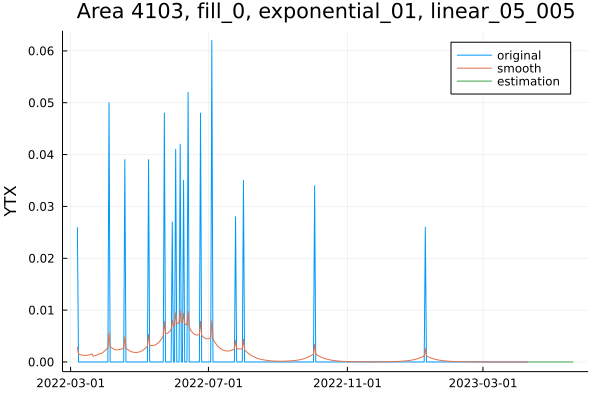

In [7]:
area_id = areas[4].id
analysis_type = analysis[6]
fill_type = fill_types[1]
smooth_type = smooth_types[5]
estimation_type = estimation_types[2]


curve_specification = string("/mrsat/", area_id, "/", analysis_type, "/curves")

curve_specification = curve_specification * "?fill_type=" * fill_type
curve_specification = curve_specification * "&smooth_type=" * smooth_type
curve_specification = curve_specification * "&estimation_type=" * estimation_type

curve = getjson(url * curve_specification)

Y_original, T_original = jsonpoints2array(curve.original.points)
Y_smooth, T_smooth = jsonpoints2array(curve.smooth.points)
Y_estimation, T_estimation = jsonpoints2array(curve.estimation.points)
    

plot(T_original, Y_original, label="original")
plot!(T_smooth, Y_smooth, label="smooth")
plot!(T_estimation, Y_estimation, label="estimation")
ylabel!(analysis_type)
title!("Area "*string(area_id)*", "*fill_type*", "*smooth_type*", "*estimation_type)

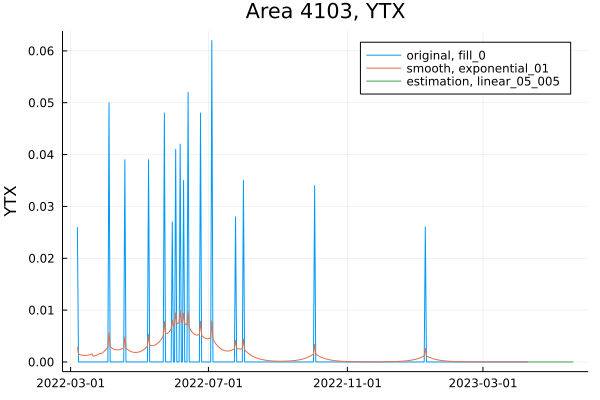

In [8]:
area_id = areas[4].id
analysis_type = analysis[6]
fill_type = fill_types[1]
smooth_type = smooth_types[5]
estimation_type = estimation_types[2]


curve_specification = string("/mrsat/", area_id, "/", analysis_type, "/curves")

curve_specification = curve_specification * "?fill_type=" * fill_type
curve_specification = curve_specification * "&smooth_type=" * smooth_type
curve_specification = curve_specification * "&estimation_type=" * estimation_type

curve = getjson(url * curve_specification)

Y_original, T_original = jsonpoints2array(curve.original.points)
Y_smooth, T_smooth = jsonpoints2array(curve.smooth.points)
Y_estimation, T_estimation = jsonpoints2array(curve.estimation.points)
    

plot(T_original, Y_original, label="original, "*fill_type)
title!("Area "*string(area_id)*", "*analysis_type)


plot!(T_smooth, Y_smooth, label="smooth, "*smooth_type)
plot!(T_estimation, Y_estimation, label="estimation, "*estimation_type)
ylabel!(analysis_type)
